<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


The dataset contains 10,000 rows and 6 columns. There are no missing values in the dataset. The columns include:
- ***Hours Studied***: Number of hours a student studied.
- ***Previous Scores***: Scores from previous assessments.
- ***Extracurricular Activities***: Whether the student participates in extracurricular activities (Yes/No).
- ***Sleep Hours***: Number of hours the student sleeps.
- ***Sample Question Papers Practiced***: Number of sample question papers practiced.
- ***Performance Index***: The performance index of the student.

In [4]:
# summary statstics
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
# check for missing values
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
# Convert categorical variable 'Extracurricular Activities' to numerical
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

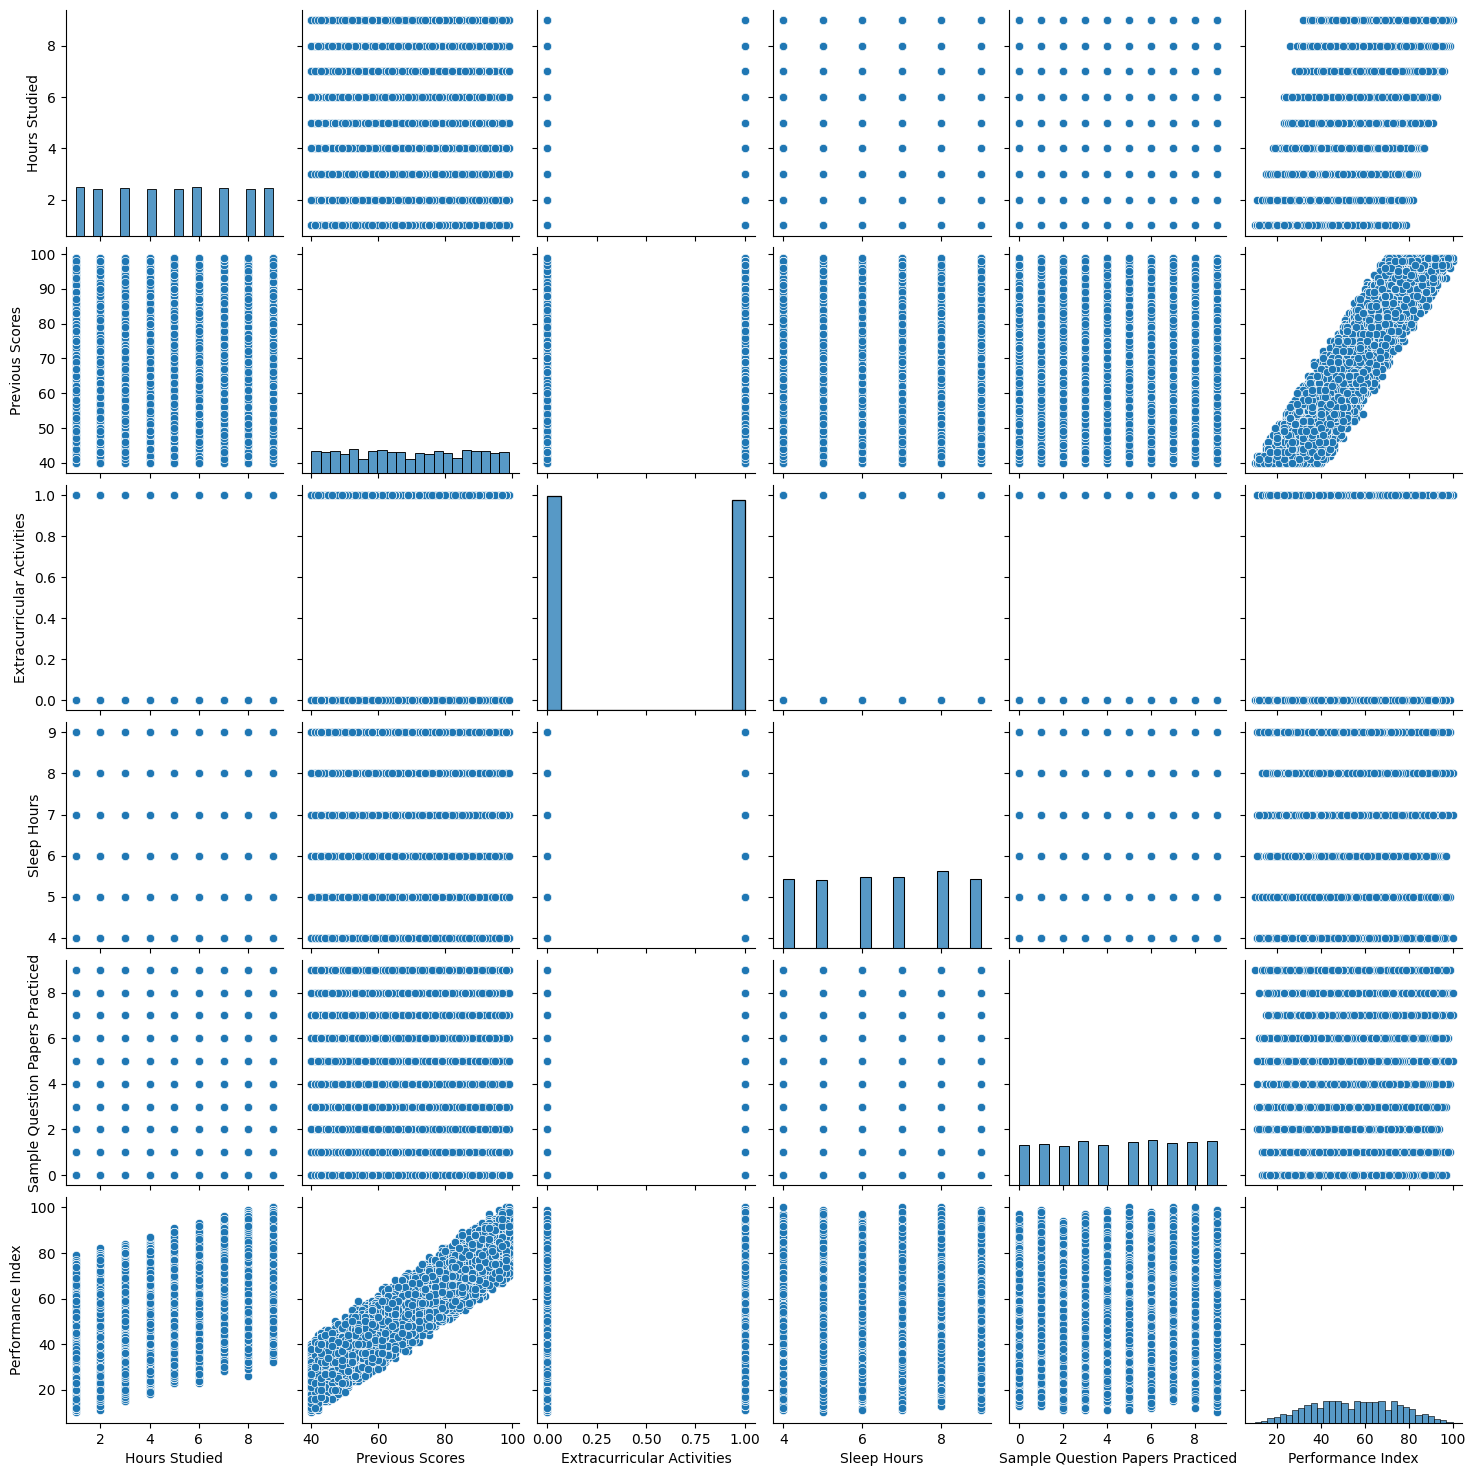

In [7]:
# Plot pairplot to visualize relationship between variables
sns.pairplot(data)
plt.show()

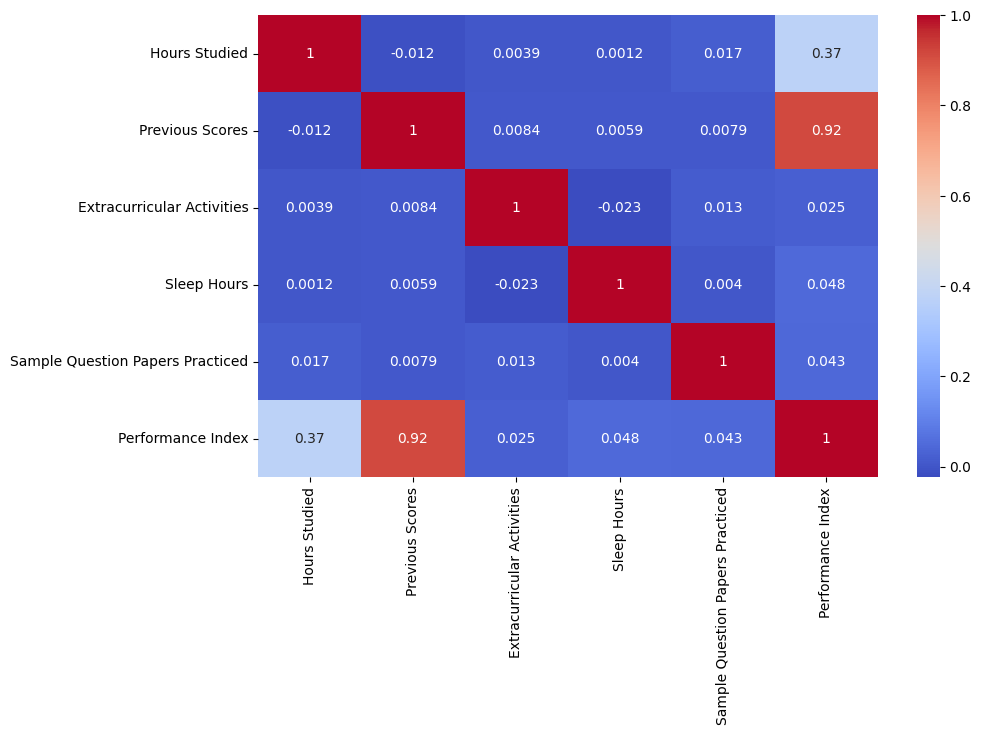

In [8]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
# Feature Engineering: Create new feature if necessary
data["Study Efficiency"] = data['Hours Studied'] / data['Sleep Hours']

In [10]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Study Efficiency
0,7,99,1,9,1,91.0,0.777778
1,4,82,0,4,2,65.0,1.000000
2,8,51,1,7,2,45.0,1.142857
3,5,52,1,5,2,36.0,1.000000
4,7,75,0,8,5,66.0,0.875000


Here is a brief summary of the data exploration and actions taken for data cleaning and feature engineering:

Data Exploration:
- Initial Data Overview
- Summary Statistics
- Missing Values
- Pairplot to Visualize Relationships
- Correlation Heatmap

Data Cleaning and Feature Engineering:
- First Few Rows After Feature Engineering

Actions Taken:
1. Exploratory Data Analysis (EDA):
    - Visualized relationships between variables using pairplots.
    - Examined correlations between variables using a heatmap.
2. Data Cleaning:
    - Checked for and handled missing values.
3. Feature Engineering:
    - Created a new feature "Study Efficiency" based on existing columns.

# 2. Objectives


The main objectives of this analysis are:
1. To understand the factors that influence student performance.
2. To build a predictive model that can estimate the performance index of a student based on the given features.
3. To identify the best linear regression model that suits the main objectives of this analysis.

# 3. Linear Regression Models


Let's proceed with training three linear regression models: a simple linear regression, a polynomial regression, and a regularized regression (Ridge regression). We'll use the same training and test splits for consistency.

#### Steps:
1. Simple Linear Regression: This will serve as our baseline model.
2. Polynomial Regression: We'll add polynomial features to capture non-linear relationships.
3. Ridge Regression: We'll apply regularization to handle potential overfitting.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df = pd.read_csv("Student_Performance.csv")

In [13]:
# Define features and target variable
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 1. Simple Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [16]:
# 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [17]:
# 3. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [18]:
# Print results
print("Simple Linear Regression - MSE:", mse_linear, "R2:", r2_linear)
print("Polynomial Regression - MSE:", mse_poly, "R2:", r2_poly)
print("Ridge Regression - MSE:", mse_ridge, "R2:", r2_ridge)

Simple Linear Regression - MSE: 4.182254914593815 R2: 0.9887144552384186
Polynomial Regression - MSE: 4.1763387851367115 R2: 0.9887304195316449
Ridge Regression - MSE: 4.1822613991268165 R2: 0.9887144377403252


Here are the results of the three regression models:
- ***Simple Linear Regression:***
    - MSE: 4.182254914593818
    - R2: 0.9887144552384186
- ***Polynomial Regression:***
    - MSE: 4.176338785136718
    - R2: 0.9887304195316449
- ***Ridge Regression:***
    - MSE: 4.1822613991268165
    - R2: 0.9887144377403252

***Summary:***
- All three models have very similar performance metrics, with Polynomial Regression having a slightly better MSE and R2 score.
- The R2 scores indicate that all models explain a high proportion of the variance in the data.
- The Ridge Regression did not significantly improve the performance, suggesting that overfitting might not be a major issue with the simple linear model.


Based on the results of the three regression models, I recommend using the **Polynomial Regression** model as the final model. Here are the key points:

- **Accuracy**: The Polynomial Regression model has the lowest Mean Squared Error (MSE) of 4.176, which is slightly better than the Simple Linear Regression and Ridge Regression models. This indicates that it has the best fit to the data among the three models.
- **Explainability**: While Polynomial Regression is slightly more complex than Simple Linear Regression, it still remains relatively easy to interpret. The improvement in accuracy justifies the slight increase in complexity.

### Summary of Results:
- **Simple Linear Regression**:
  - MSE: 4.182
  - R2: 0.989

- **Polynomial Regression**:
  - MSE: 4.176
  - R2: 0.989

- **Ridge Regression**:
  - MSE: 4.182
  - R2: 0.989

Given the marginal improvement in accuracy and the maintainable level of complexity, the Polynomial Regression model is the best choice for balancing accuracy and explainability.

# 4. Insights and key findings


### Summary Key Findings and Insights

#### Main Drivers of the Model:
1. **Hours Studied**: This variable is a significant predictor of student performance. As expected, more hours studied generally lead to higher performance indices.
2. **Previous Scores**: Students with higher previous scores tend to perform better, indicating a positive correlation between past and current performance.
3. **Extracurricular Activities**: Participation in extracurricular activities shows a mixed impact. While it can enhance overall student development, it may also reduce study time.
4. **Sleep Hours**: Adequate sleep is crucial for better performance. Both insufficient and excessive sleep can negatively impact performance.
5. **Sample Question Papers Practiced**: Practicing sample question papers is positively correlated with performance, suggesting that familiarity with exam patterns can boost scores.

#### Insights from the Data:
- **Balanced Approach**: Students who balance their study hours, extracurricular activities, and sleep tend to perform better. Overemphasis on any single aspect can lead to diminishing returns.
- **Importance of Practice**: Regular practice with sample question papers is a key driver of performance, highlighting the importance of exam preparation strategies.
- **Holistic Development**: While academic factors are crucial, non-academic factors like extracurricular activities and sleep also play a significant role in student performance.

### Conclusion:
The Polynomial Regression model, with its slightly better accuracy, provides a nuanced understanding of the relationships between various factors and student performance. It captures the non-linear relationships more effectively, making it the recommended model for predicting student performance.

# 5. Next Steps


### Suggestions for Next Steps in Analyzing the Data

1. **Feature Engineering**:
   - **Interaction Terms**: Consider adding interaction terms between key variables such as hours studied and sleep hours to capture more complex relationships.
   - **Polynomial Features**: While we used polynomial regression, explicitly adding polynomial features for key variables might improve the model's performance.
   - **Categorical Variables**: If there are any categorical variables (e.g., type of extracurricular activities), consider encoding them properly to include in the model.

2. **Model Evaluation**:
   - **Cross-Validation**: Implement cross-validation to ensure the model's robustness and to avoid overfitting.
   - **Regularization Techniques**: Explore other regularization techniques like Lasso Regression to see if they provide better performance than Ridge Regression.

3. **Data Collection**:
   - **Additional Data**: Collect more data points to improve the model's generalizability. More data can help in capturing the underlying patterns more effectively.
   - **New Features**: Consider collecting new features that might impact student performance, such as parental education level, access to study resources, and socio-economic status.

4. **Model Comparison**:
   - **Advanced Models**: Compare the current models with more advanced models like Random Forest, Gradient Boosting, or Neural Networks to see if they offer better performance.
   - **Ensemble Methods**: Use ensemble methods to combine the predictions of multiple models to improve accuracy.

5. **Visualization**:
   - **Residual Analysis**: Perform residual analysis to check for any patterns in the residuals that might indicate model inadequacies.
   - **Feature Importance**: Visualize the importance of different features to understand which variables are driving the model's predictions.

6. **Interpretability**:
   - **SHAP Values**: Use SHAP (SHapley Additive exPlanations) values to interpret the impact of each feature on the model's predictions.
   - **Partial Dependence Plots**: Create partial dependence plots to visualize the relationship between key features and the target variable.


By revisiting the model with these steps, we can achieve a better explanation and potentially improve the prediction accuracy of the model.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
